# CS 6220 Final Project: Predicting Firms' Financial Risk
**Group Members:** Jiajun Fang, Yini Li

In [44]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

# Load Parquet Files

In [45]:
# Step 1: Import required libraries
import pandas as pd
import os

In [46]:
# Step 2: Check if the Parquet files exist in the current directory
train_file = "20231124_Financial_Risk_Project_train (1).parquet" # We will only use this file for final project because test_file has no FinancialRisk measurement
# test_file = "20231124_Financial_Risk_Project_test_public (1).parquet"

print("Train file exists:", os.path.exists(train_file))
# print("Test file exists:", os.path.exists(test_file))

Train file exists: True


In [47]:
# Step 3: Load the parquet files
train_df = pd.read_parquet(train_file)
# test_df = pd.read_parquet(test_file)

print("Train shape:", train_df.shape)
# print("Test shape:", test_df.shape)

train_df.head()

Train shape: (415, 73)


,url,call_transcript,VWAP,exchangeCountry,securityType,CIK,name,securityID,incorporationCountry,exchangeName,...,Working Capital,businessDescription,close,dividendFactor,fiscalDint,floatShares,outstandingShares,shortInterestFloat,FinancialSector,FinancialRisk
ticker,,,,,,,,,,,,,,,,,,,,,
FICO,https://seekingalpha.com/article/4649507-fair-...,Fair Isaac Corporation (FICO) Q4 2023 Earnings...,700.83,USA,Common or ordinary,0000814547,Fair Isaac Corporation,138240101,USA,New York Stock Exchange,...,5.063632,"Fair Isaac Corporation develops analytic, soft...",598.58,1.000000,20221231,24272216.0,25154000.0,0.033322,0,0.0
RXRX,https://seekingalpha.com/earnings/earnings-cal...,Earnings Call Transcripts | Seeking Alpha\n\n\...,6.67,USA,Common or ordinary,0001601830,Recursion Pharmaceauticals Inc,384740101,USA,Nasdaq Stock Market,...,2.528944,"Recursion Pharmaceuticals, Inc. operates as a ...",7.71,1.000000,20221231,117933131.0,174072906.0,0.130693,0,0.0
BLDR,https://seekingalpha.com/article/4645938-build...,"Builders FirstSource, Inc. (BLDR) Q3 2023 Earn...",88.34,USA,Common or ordinary,0001316835,Builders FirstSource Inc,1630360101,USA,New York Stock Exchange,...,11.272943,"Builders FirstSource, Inc., together with its ...",64.88,1.000000,20221231,146461116.0,148994000.0,0.040739,0,0.0
JKHY,https://seekingalpha.com/article/4649242-jack-...,"Jack Henry & Associates, Inc. (JKHY) Q1 2024 E...",150.47,USA,Common or ordinary,0000779152,Henry (Jack) & Associates Inc,118110101,USA,Nasdaq Stock Market,...,0.843418,"Jack Henry & Associates, Inc., a financial tec...",175.56,0.989936,20221231,72430647.0,72910225.0,0.030052,0,0.0
OC,https://seekingalpha.com/article/4643409-owens...,Owens Corning (OC) Q3 2023 Earnings Call Trans...,95.47,USA,Common or ordinary,0001370946,Owens Corning,82140601,USA,New York Stock Exchange,...,15.414013,Owens Corning engages in manufacture and sale ...,85.30,0.980838,20221231,94098317.0,94700000.0,0.038574,0,0.0


In [48]:
# Use the already loaded parquet data
df = train_df.copy()
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (415, 73)


,url,call_transcript,VWAP,exchangeCountry,securityType,CIK,name,securityID,incorporationCountry,exchangeName,...,Working Capital,businessDescription,close,dividendFactor,fiscalDint,floatShares,outstandingShares,shortInterestFloat,FinancialSector,FinancialRisk
ticker,,,,,,,,,,,,,,,,,,,,,
FICO,https://seekingalpha.com/article/4649507-fair-...,Fair Isaac Corporation (FICO) Q4 2023 Earnings...,700.83,USA,Common or ordinary,0000814547,Fair Isaac Corporation,138240101,USA,New York Stock Exchange,...,5.063632,"Fair Isaac Corporation develops analytic, soft...",598.58,1.000000,20221231,24272216.0,25154000.0,0.033322,0,0.0
RXRX,https://seekingalpha.com/earnings/earnings-cal...,Earnings Call Transcripts | Seeking Alpha\n\n\...,6.67,USA,Common or ordinary,0001601830,Recursion Pharmaceauticals Inc,384740101,USA,Nasdaq Stock Market,...,2.528944,"Recursion Pharmaceuticals, Inc. operates as a ...",7.71,1.000000,20221231,117933131.0,174072906.0,0.130693,0,0.0
BLDR,https://seekingalpha.com/article/4645938-build...,"Builders FirstSource, Inc. (BLDR) Q3 2023 Earn...",88.34,USA,Common or ordinary,0001316835,Builders FirstSource Inc,1630360101,USA,New York Stock Exchange,...,11.272943,"Builders FirstSource, Inc., together with its ...",64.88,1.000000,20221231,146461116.0,148994000.0,0.040739,0,0.0
JKHY,https://seekingalpha.com/article/4649242-jack-...,"Jack Henry & Associates, Inc. (JKHY) Q1 2024 E...",150.47,USA,Common or ordinary,0000779152,Henry (Jack) & Associates Inc,118110101,USA,Nasdaq Stock Market,...,0.843418,"Jack Henry & Associates, Inc., a financial tec...",175.56,0.989936,20221231,72430647.0,72910225.0,0.030052,0,0.0
OC,https://seekingalpha.com/article/4643409-owens...,Owens Corning (OC) Q3 2023 Earnings Call Trans...,95.47,USA,Common or ordinary,0001370946,Owens Corning,82140601,USA,New York Stock Exchange,...,15.414013,Owens Corning engages in manufacture and sale ...,85.30,0.980838,20221231,94098317.0,94700000.0,0.038574,0,0.0


## Data Cleaning

In [49]:
# Drop irrelevant features
irrelevant_cols = ['url', 'exchangeCountry', 'CIK', 'securityID', 
                   'incorporationCountry', 'exchangeName', 'exchangeID', 'businessDescription', 'FinancialSector']

# Drop FinancialSector because the variable describes which company is a finance company and we should not know this for the purpsoe of this project
df.drop(columns=irrelevant_cols, inplace=True, errors='ignore')

# Drop FinancialSector variable?

# Drop columns with more than 20% missing values
missing_threshold = 0.2
df.dropna(axis=1, thresh=(1 - missing_threshold) * len(df), inplace=True)

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

## Exploratory Data Analysis (EDA)

In [50]:
df.describe()

,VWAP,Accrual Ratio,Assets,B/P,CF/P,Capital Expenditure,Cash,Debt/Equity,Depreciation,Dividend,...,Short Term Debt,TEV,Working Capital,close,dividendFactor,fiscalDint,floatShares,outstandingShares,shortInterestFloat,FinancialRisk
count,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,397.000000,415.000000,415.000000,...,415.000000,399.000000,415.000000,415.000000,415.000000,4.150000e+02,4.150000e+02,4.150000e+02,414.000000,415.000000
mean,116.474308,-0.018919,200.850240,0.527509,0.112481,2.303081,18.136927,1.914057,1.930943,1.604028,...,9.638088,132.510298,5.553125,110.817879,0.978670,2.022126e+07,5.162328e+08,5.584309e+08,0.039076,0.049077
std,216.885791,0.176063,408.857675,0.467866,0.195024,4.525536,70.680449,7.141619,3.588728,2.162034,...,48.195878,215.511729,17.098716,190.034596,0.025503,6.180495e+02,1.397186e+09,1.497614e+09,0.039058,0.117747
min,0.199900,-3.202525,1.228840,-0.636664,-0.775506,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-63.167179,-105.669178,1.830000,0.863362,2.022103e+07,1.305533e+07,1.365940e+07,0.002825,-0.102909
25%,24.995000,-0.030362,37.962225,0.170290,0.035302,0.123280,2.487505,0.337896,0.123215,0.000000,...,0.180620,37.830784,0.000000,27.245000,0.968785,2.022123e+07,7.171691e+07,7.712301e+07,0.015174,0.000000
50%,57.950000,-0.005417,78.088405,0.454349,0.079560,0.701300,5.497844,0.738463,0.810170,1.036192,...,1.153693,75.609645,0.000000,61.350000,0.985036,2.022123e+07,1.518589e+08,1.665872e+08,0.026484,0.000000
75%,130.317500,0.018226,183.633250,0.763030,0.166526,2.418535,13.397640,1.463662,2.658760,2.111366,...,4.958480,153.935241,6.529998,130.060000,1.000000,2.022123e+07,3.686314e+08,3.947026e+08,0.049398,0.060544
max,2648.960000,0.261432,4042.049341,3.750665,1.727142,57.515690,1309.060835,116.069725,54.195690,19.611487,...,882.360527,2924.920173,189.206644,2460.840000,1.000000,2.023010e+07,1.592372e+10,1.594342e+10,0.287963,0.998330


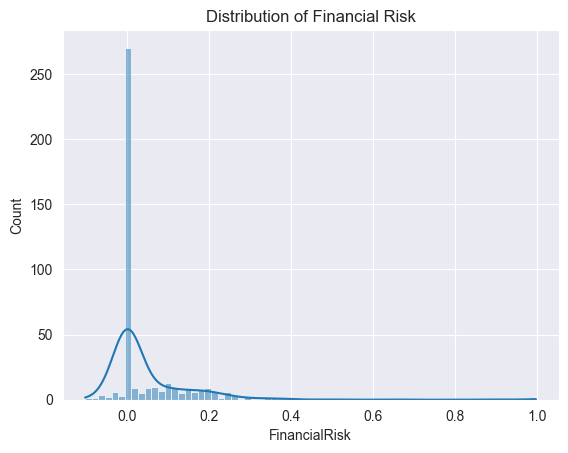

In [51]:
# Check distribution of target
sns.histplot(df['FinancialRisk'], kde=True)
plt.title('Distribution of Financial Risk')
plt.show()

# Log-transform target
df['FinancialRisk_log'] = np.log1p(df['FinancialRisk'])

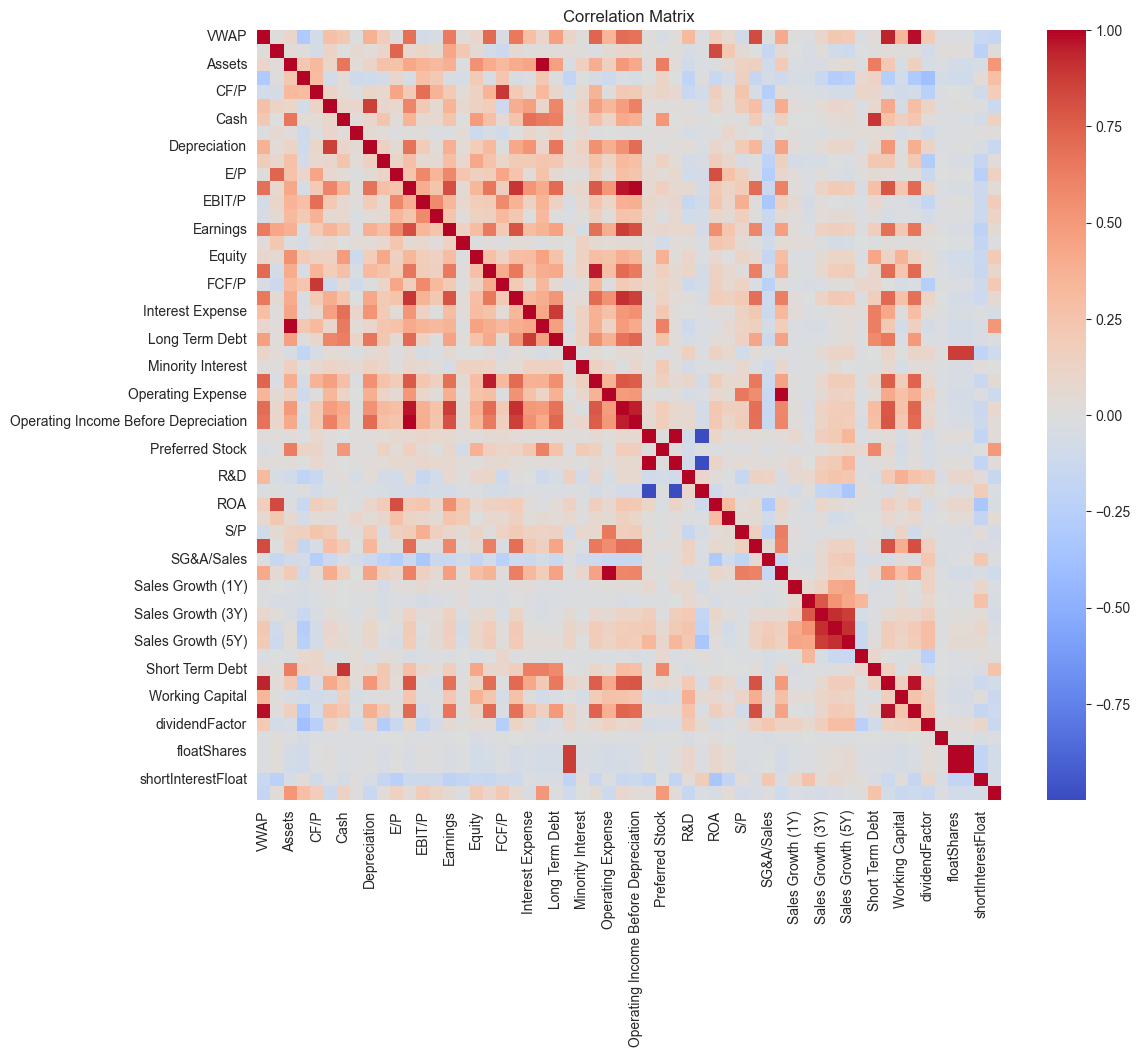

In [52]:
# Correlation matrix
plt.figure(figsize=(12, 10))
corr = df[num_cols].corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [53]:
# Distribution of some variables with the highest correlation score

# Get correlation with the outcome variable
target_corr = corr['FinancialRisk'].drop('FinancialRisk')

# Select features with |correlation| > 0.2
selected = target_corr[abs(target_corr) > 0.2]

# Print feature names and their correlation scores
print("Selected Features and Correlation Scores:\n")
for feature, score in selected.items():
    print(f"{feature}: {score:.3f}")


Selected Features and Correlation Scores:

Assets: 0.509
B/P: 0.289
FCF/P: 0.214
Long Liabilities: 0.514
Preferred Stock: 0.495
Short Term Debt: 0.264


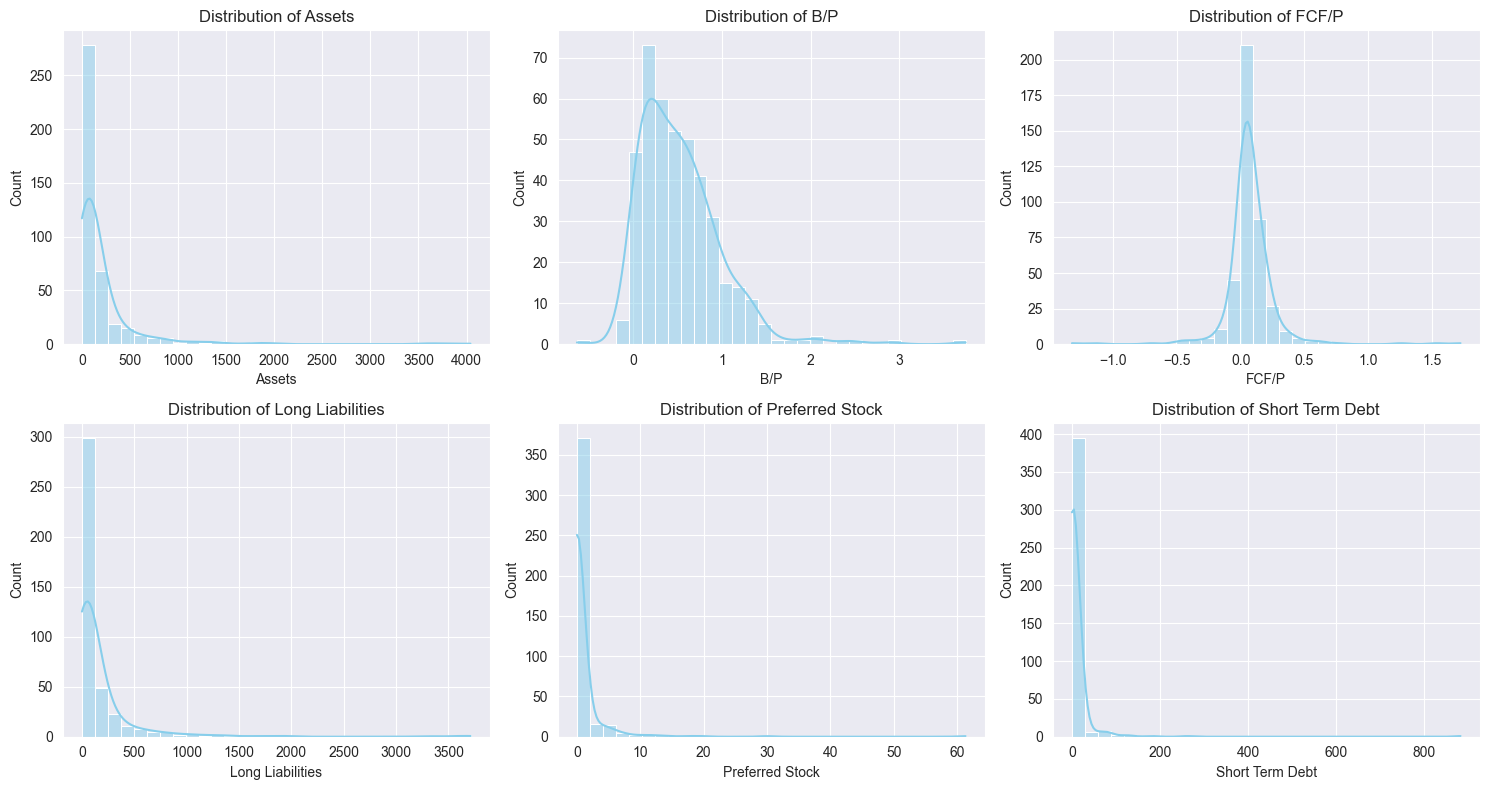

In [54]:
# Set up the plot grid
# Plot the variables distribution (histogram) using for loops
num_feats = len(selected)
cols = 3
rows = (num_feats + cols - 1) // cols

plt.figure(figsize=(5 * cols, 4 * rows))

for i, col in enumerate(selected.index, 1):  # use selected.index instead of selected
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


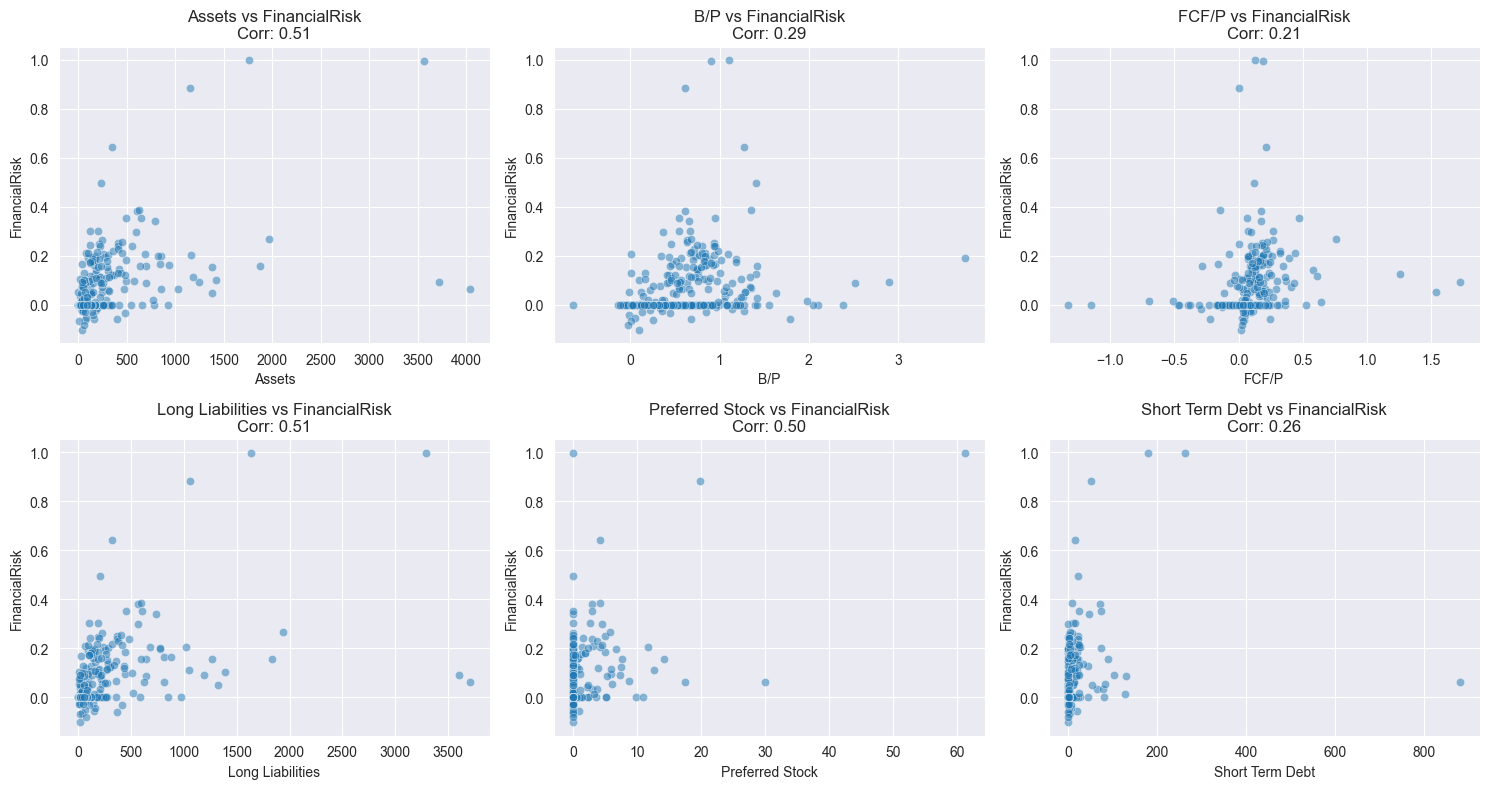

In [55]:
# Scatter plots between the highest correlated variable with outcome variable (FinancialRisk

# Scatter plots between selected features and FinancialRisk
num_feats = len(selected)
cols = 3
rows = (num_feats + cols - 1) // cols

plt.figure(figsize=(5 * cols, 4 * rows))

for i, col in enumerate(selected.index, 1):
    plt.subplot(rows, cols, i)
    sns.scatterplot(data=df, x=col, y='FinancialRisk', alpha=0.5)
    plt.title(f'{col} vs FinancialRisk\nCorr: {selected[col]:.2f}')
    plt.xlabel(col)
    plt.ylabel('FinancialRisk')

plt.tight_layout()
plt.show()


## Baseline Model: Linear Regression

In [56]:
# Baseline Model: Linear Regression
selected_features = ['Assets', 'Cash', 'Debt/Equity', 'B/P', 'SG&A/Sales', 'Long Liabilities']
print('Columns in DataFrame:', df.columns.tolist())
missing_features = [col for col in selected_features if col not in df.columns]
if missing_features:
    print('The following features are missing from the data:', missing_features)
else:
    print('All selected features are present in the data.')
if 'FinancialRisk_log' not in df.columns:
    print('FinancialRisk_log column is missing. Please make sure the previous cell has been executed.')
else:
    print('FinancialRisk_log column exists.')
print('Missing value count for selected features:')
print(df[selected_features].isnull().sum())
# Convert selected features to numeric type
for col in selected_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')
# Remove all rows with missing values in selected features or target
df_clean = df.dropna(subset=selected_features + ['FinancialRisk_log']).copy()
print('Shape after dropping missing:', df_clean.shape)
# Continue with modeling
X = df_clean[selected_features]
y = df_clean['FinancialRisk_log']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X.columns)
    ])
from sklearn.linear_model import LinearRegression
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print(f'R² Score: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')

Columns in DataFrame: ['call_transcript', 'VWAP', 'securityType', 'name', 'Accrual Ratio', 'Assets', 'B/P', 'CF/P', 'Capital Expenditure', 'Cash', 'Debt/Equity', 'Depreciation', 'Dividend', 'E/P', 'EBIT', 'EBIT/P', 'EBIT/TEV', 'Earnings', 'Earnings Growth (1Y)', 'Equity', 'FCF', 'FCF/P', 'Income Tax', 'Interest Expense', 'Long Liabilities', 'Long Term Debt', 'Market Cap', 'Minority Interest', 'Operating Cash Flow', 'Operating Expense', 'Operating Income', 'Operating Income Before Depreciation', 'Operating Margin', 'Preferred Stock', 'Profit Margin', 'R&D', 'R&D/Sales', 'ROA', 'ROE', 'S/P', 'SG&A', 'SG&A/Sales', 'Sales', 'Sales Growth (1Y)', 'Sales Growth (2Y)', 'Sales Growth (3Y)', 'Sales Growth (4Y)', 'Sales Growth (5Y)', 'Sales Variability', 'Short Term Debt', 'TEV', 'Working Capital', 'close', 'dividendFactor', 'fiscalDint', 'floatShares', 'outstandingShares', 'shortInterestFloat', 'FinancialRisk', 'FinancialRisk_log']
All selected features are present in the data.
FinancialRisk_log

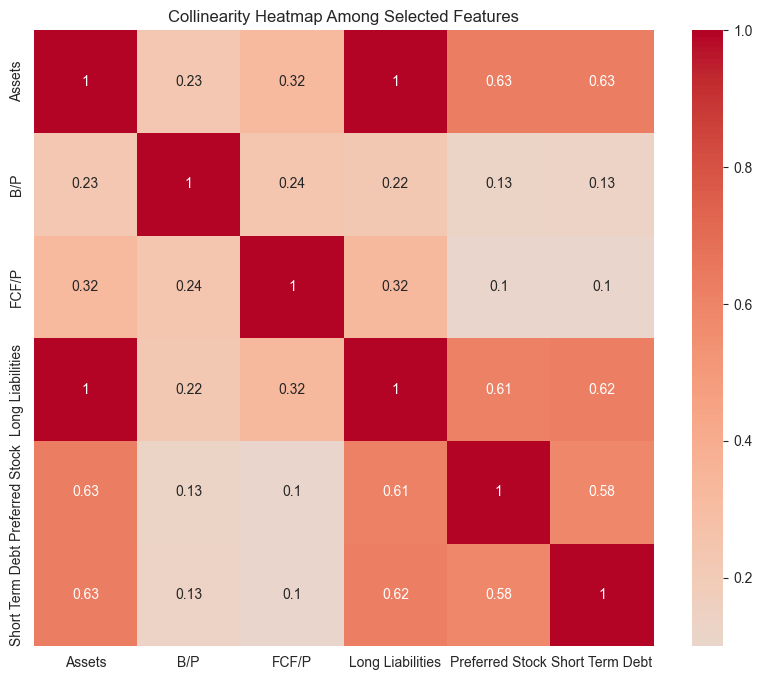

In [57]:
# Test Co-linearity between the highly correlated variables

# Correlation heatmap of selected features
plt.figure(figsize=(10, 8))
sns.heatmap(df[selected.index].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Collinearity Heatmap Among Selected Features")
plt.show()


In [58]:
# Further examines multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

X = df[selected.index].dropna()
X = add_constant(X)

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)
# Baseline model might have low performance because Asset and Long Liabilities are strongly correlated with each other

            Feature         VIF
0             const    2.703747
1            Assets  143.285350
2               B/P    1.101047
3             FCF/P    1.182681
4  Long Liabilities  137.109055
5   Preferred Stock    1.878595
6   Short Term Debt    1.873132


In [59]:
# Drop Assets or Long Liabilities (drop asset) because it is highly correlated with each other
reduced_features = selected.index.drop('Assets')

## Modeling 2: Regularization Techniques
Using Lasso, Ridge, and elastic net + stepwise selection



Try the regularization models with all the features

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

full_features = df.drop(columns=['FinancialRisk', 'Assets','FinancialRisk_log'])  # Drop target
X = full_features.select_dtypes(include=[np.number]).dropna() # Keep only numerical features
y = df.loc[X.index, 'FinancialRisk']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [99]:
# Train regularized models
# Lasso
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)

# Ridge
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge.fit(X_train, y_train)

# ElasticNet
elastic = ElasticNetCV(cv=5, random_state=42)
elastic.fit(X_train, y_train)

#  Evaluation function
def evaluate(model, name):
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f"{name} Performance:")
    print(f"  R²: {r2:.3f}")
    print(f"  RMSE: {rmse:.3f}")
    print("-" * 30)
    return r2, rmse

# Run evaluations
lasso_r2, lasso_rmse = evaluate(lasso, "Lasso")
ridge_r2, ridge_rmse = evaluate(ridge, "Ridge")
elastic_r2, elastic_rmse = evaluate(elastic, "Elastic Net")

# For Lasso, Ridge, ElasticNet
models = {'Lasso': lasso, 'Ridge': ridge, 'ElasticNet': elastic}

for name, model in models.items():
    print(f"{name} Coefficients:")
    for feat, coef in zip(X.columns, model.coef_):
        print(f"{feat}: {coef:.4f}")
    print("-" * 40)


Lasso Performance:
  R²: 0.393
  RMSE: 0.068
------------------------------
Ridge Performance:
  R²: -0.481
  RMSE: 0.106
------------------------------
Elastic Net Performance:
  R²: 0.389
  RMSE: 0.068
------------------------------
Lasso Coefficients:
VWAP: -0.0031
Accrual Ratio: -0.0000
B/P: 0.0096
CF/P: 0.0000
Capital Expenditure: -0.0000
Cash: -0.0000
Debt/Equity: 0.0000
Depreciation: -0.0000
Dividend: -0.0000
E/P: 0.0001
EBIT: -0.0000
EBIT/P: 0.0000
EBIT/TEV: 0.0000
Earnings: -0.0000
Earnings Growth (1Y): 0.0000
Equity: -0.0000
FCF: -0.0000
FCF/P: 0.0000
Income Tax: -0.0000
Interest Expense: -0.0217
Long Liabilities: 0.0501
Long Term Debt: -0.0000
Market Cap: -0.0000
Minority Interest: -0.0000
Operating Cash Flow: -0.0000
Operating Expense: -0.0000
Operating Income: -0.0000
Operating Income Before Depreciation: -0.0000
Operating Margin: 0.0000
Preferred Stock: 0.0153
Profit Margin: 0.0000
R&D: -0.0000
R&D/Sales: -0.0000
ROA: -0.0000
ROE: -0.0000
S/P: -0.0000
SG&A: -0.0000
SG&A/S

Lasso and Elastic Net outperforms Ridge because the former two models can perform feature selection by shrinking coefficients to exactly zero when there are many features

Try the regularization models by only using features with correlation > 0.2

In [85]:
X = df[reduced_features].dropna()

y = df.loc[X.index, 'FinancialRisk']
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [86]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

# Lasso
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)

# Ridge
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge.fit(X_train, y_train)

# Elastic Net
elastic = ElasticNetCV(cv=5, random_state=42)
elastic.fit(X_train, y_train)


ElasticNetCV(cv=5, random_state=42)

In [89]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

def evaluate(model, X_test, y_test, name="Model"):
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f"{name} Performance:")
    print(f"  R²: {r2:.3f}")
    print(f"  RMSE: {rmse:.3f}")
    print("-" * 30)

evaluate(lasso, X_test, y_test, "Lasso")
evaluate(ridge, X_test, y_test, "Ridge")
evaluate(elastic, X_test, y_test, "Elastic Net")


# For Lasso, Ridge, ElasticNet
models = {'Lasso': lasso, 'Ridge': ridge, 'ElasticNet': elastic}

for name, model in models.items():
    print(f"{name} Coefficients:")
    for feat, coef in zip(X.columns, model.coef_):
        print(f"{feat}: {coef:.4f}")
    print("-" * 40)

Lasso Performance:
  R²: 0.250
  RMSE: 0.086
------------------------------
Ridge Performance:
  R²: 0.368
  RMSE: 0.079
------------------------------
Elastic Net Performance:
  R²: 0.239
  RMSE: 0.087
------------------------------
Lasso Coefficients:
B/P: 0.0053
FCF/P: 0.0000
Long Liabilities: 0.0264
Preferred Stock: 0.0226
Short Term Debt: 0.0000
----------------------------------------
Ridge Coefficients:
B/P: 0.0207
FCF/P: 0.0006
Long Liabilities: 0.0409
Preferred Stock: 0.0391
Short Term Debt: -0.0200
----------------------------------------
ElasticNet Coefficients:
B/P: 0.0042
FCF/P: 0.0000
Long Liabilities: 0.0256
Preferred Stock: 0.0217
Short Term Debt: 0.0000
----------------------------------------


## Modeling 3: non-linear models
Using Random Forest to check if non-linear models can outperform regression models (because we have a lot of variables)

In [94]:
from sklearn.ensemble import RandomForestRegressor
# Train test split
full_features = df.drop(columns=['FinancialRisk', 'Assets', 'FinancialRisk_log'])  # Drop target
X = full_features.select_dtypes(include=[np.number]).dropna() # Keep only numerical features
y = df.loc[X.index, 'FinancialRisk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [95]:
# Fit model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [96]:
# Check performance
y_pred = rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Random Forest R²: {r2:.4f}")
print(f"Random Forest RMSE: {rmse:.4f}")


Random Forest R²: -0.1234
Random Forest RMSE: 0.0927


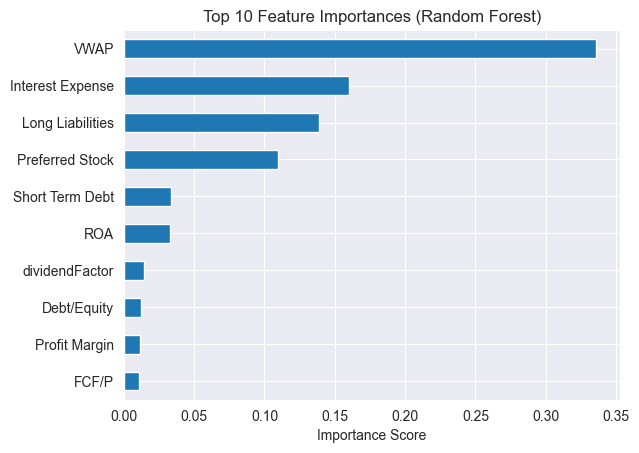

In [97]:
# Check feature importance for rf model
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()


# Findings
Compare performance between the 3 models

## Base Model: Linear Regression
R²: -0.08
RMSE: 0.08

## Regularization Model (With all features)
Ridge: 
R²: 0.393
RMSE: 0.068

Lasso:
R²: -0.481
RMSE: 0.106

Elastic Net:
R²: 0.389
RMSE: 0.068

## Regularization Model (With features > 0.2 correlation)
Ridge:
R²: 0.25
RMSE: 0.086

Lasso:
R²: 0.368
RMSE: 0.079

Elastic Net:
R²: 0.239
RMSE: 0.087


## Non-linear model (Random Forest)
R²: -0.1234
RMSE: 0.0927


Best model is Ridge Model with all features included
